# Restaurants in Mumbai

### Importing Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import geocoder
from geopy.geocoders import Nominatim 
import requests
import json

from sklearn.cluster import KMeans

import folium

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
mpl.style.use('ggplot')

#### Creating variables for connecting the Foursquare API

In [2]:
CLIENT_ID = 'YUWXSYB4B4HPPZF3GSL5I32P4N5SXLELTIZ3IO0XPSN1RYI5'
CLIENT_SECRET = '51DJZCOWAOESTODWSI3M2BYMOEH4RXH0N2SG1Q4O5JNXTPYP' 
VERSION = '20190417' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YUWXSYB4B4HPPZF3GSL5I32P4N5SXLELTIZ3IO0XPSN1RYI5
CLIENT_SECRET:51DJZCOWAOESTODWSI3M2BYMOEH4RXH0N2SG1Q4O5JNXTPYP


### Web Scraping the Mumbai neighbourhod database

In [3]:
df = pd.read_html('https://www.mapsofindia.com/pincode/india/maharashtra/mumbai/')
df = df[0]
df

,Pincode Details,Pincode Details.1,Pincode Details.2,Pincode Details.3
0,Location,Pincode,State,District
1,A I staff colony,400029,Maharashtra,Mumbai
2,Aareymilk Colony,400065,Maharashtra,Mumbai
3,Agripada,400011,Maharashtra,Mumbai
4,Airport,400099,Maharashtra,Mumbai
5,Ambewadi,400004,Maharashtra,Mumbai
6,Andheri,400053,Maharashtra,Mumbai
7,Andheri East,400069,Maharashtra,Mumbai
8,Andheri Railway station,400058,Maharashtra,Mumbai
9,Antop Hill,400037,Maharashtra,Mumbai


In [4]:
df.rename(columns={"Pincode Details": "Location", "Pincode Details.1": "Pincode"}, inplace=True)
df.drop(["Pincode Details.2","Pincode Details.3"], axis=1, inplace=True)
df.drop([0], inplace=True)

In [5]:
df.head()

,Location,Pincode
1,A I staff colony,400029
2,Aareymilk Colony,400065
3,Agripada,400011
4,Airport,400099
5,Ambewadi,400004


In [6]:
address = 'Mumbai, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai City are 18.9387711, 72.8353355.


### Using geopy library to get the latitude and longitude values of New York City.

In [8]:
address = df['Location']
pcodes = df['Pincode']
loc_latitude = []
loc_longitude = []

for A,B in zip(address,pcodes):
    try:
        A = A + ", Mumbai, maharashtra, India"
        location = geolocator.geocode(A)
        latitude = float(f"{location.latitude:.6f}")
        longitude = float(f"{location.longitude:.6f}")
        loc_latitude.append(latitude)
        loc_longitude.append(longitude)
        print(latitude,longitude)
        
    except Exception as e:
        print('Error --->',e)
        print(A)
        location = geolocator.geocode('{}, Mumbai, maharashtra, India'.format(B))
        latitude = float(f"{location.latitude:.6f}")
        longitude = float(f"{location.longitude:.6f}")
        loc_latitude.append(latitude)
        loc_longitude.append(longitude)
        print("new", latitude,longitude)
                                                                                           
df['Latitude']= loc_latitude
df['Longitude']= loc_longitude

Error ---> 'NoneType' object has no attribute 'latitude'
A I staff colony, Mumbai, maharashtra, India
new 19.151622 72.854981
Error ---> 'NoneType' object has no attribute 'latitude'
Aareymilk Colony, Mumbai, maharashtra, India
new 19.180136 72.908812
18.975302 72.824898
19.090201 72.863808
19.186776 72.859313
19.119698 72.84642
19.115883 72.854202
19.119698 72.84642
19.020761 72.865256
18.900689 72.816134
19.128315 72.840038
19.101937 72.861599
18.937132 72.832556
Error ---> 'NoneType' object has no attribute 'latitude'
B.P.lane, Mumbai, maharashtra, India
new 18.951606 72.834797
19.058336 72.830267
19.061657 72.849811
19.168814 72.833678
18.928665 72.832264
19.152814 72.839021
19.06333 72.856474
19.015786 72.83737
Error ---> 'NoneType' object has no attribute 'latitude'
Bhawani Shankar rd, Mumbai, maharashtra, India
new 18.938771 72.835335
19.229068 72.857363
19.226723 72.861933
Error ---> 'NoneType' object has no attribute 'latitude'
Borvali West, Mumbai, maharashtra, India
new 19.2

new 19.076646 72.833151
Error ---> 'NoneType' object has no attribute 'latitude'
V.W.t.c., Mumbai, maharashtra, India
new 18.916863 72.824315
19.081363 72.853893
Error ---> 'NoneType' object has no attribute 'latitude'
Vesava, Mumbai, maharashtra, India
new 19.133736 72.814877
Error ---> 'NoneType' object has no attribute 'latitude'
Vidyanagari, Mumbai, maharashtra, India
new 19.109092 72.860771
Error ---> 'NoneType' object has no attribute 'latitude'
Vileeparle (east), Mumbai, maharashtra, India
new 19.100066 72.845356
Error ---> 'NoneType' object has no attribute 'latitude'
Vileparle Railway station, Mumbai, maharashtra, India
new 19.100066 72.845356
Error ---> 'NoneType' object has no attribute 'latitude'
Vileparle(west), Mumbai, maharashtra, India
new 19.062992 73.119256
19.026919 72.875934
Error ---> 'NoneType' object has no attribute 'latitude'
Wadala Rs, Mumbai, maharashtra, India
new 19.010839 72.849727
19.011696 72.81807
19.030098 72.841636
19.007411 72.816224
Error ---> 'None

In [9]:
df

,Location,Pincode,Latitude,Longitude
1,A I staff colony,400029,19.151622,72.854981
2,Aareymilk Colony,400065,19.180136,72.908812
3,Agripada,400011,18.975302,72.824898
4,Airport,400099,19.090201,72.863808
5,Ambewadi,400004,19.186776,72.859313
6,Andheri,400053,19.119698,72.846420
7,Andheri East,400069,19.115883,72.854202
8,Andheri Railway station,400058,19.119698,72.846420
9,Antop Hill,400037,19.020761,72.865256
10,Asvini,400005,18.900689,72.816134


## Map of Mumbai

In [10]:
# create map of Mumbai using latitude and longitude values
map_mum = folium.Map(location=[19.0760, 72.8777], zoom_start=11)

# add markers to map
for lat, lng, loc in zip(df['Latitude'], df['Longitude'], df['Location']):
    label = '{}'.format(loc)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#cc3131',
        fill_opacity=0.5,
        parse_html=False).add_to(map_mum)  
    
map_mum

In [12]:
neighborhood_latitude = df.loc[45, 'Latitude']
neighborhood_longitude = df.loc[45, 'Longitude']

neighborhood_name = df.loc[45, 'Location']

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Danda are 19.076779, 72.825031.


### Setting the Limit and Radius for the API

In [13]:
LIMIT = 200
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [14]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ebe8f1047b43d00231e8af2'},
 'response': {'headerLocation': 'Bandra West',
  'headerFullLocation': 'Bandra West, Mumbai',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 19.081279004500004,
    'lng': 72.82978360886237},
   'sw': {'lat': 19.072278995499993, 'lng': 72.82027839113762}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57c81040498e1cd1383383c7',
       'name': 'Koinonia Coffee Roasters',
       'location': {'address': '66, Chuim Village Road, Danda, Pali Hill',
        'crossStreet': 'Bandra',
        'lat': 19.073263816388312,
        'lng': 72.82617788108536,
        'labeledLatLngs': [{'label': 'display',
          'lat': 19.073263816388312,
          'lng': 72.82

In [15]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.io.json.json_normalize(venues) 

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Koinonia Coffee Roasters,Café,19.073264,72.826178
1,Pizza Hut,Pizza Place,19.077040,72.828133
2,Cafe Coffee Day,Café,19.074862,72.826675
3,Thalassa,Mediterranean Restaurant,19.075005,72.827050


## Exploring Neighborhoods in Mumbai

#### Function to repeat the same process to all the neighborhoods in Mumbai

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Code to run the above function on each neighborhood and create a new dataframe called *Mumbai_venues*.

In [18]:
Mumbai_venues = getNearbyVenues(names=df['Location'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

A I staff colony
Aareymilk Colony
Agripada
Airport
Ambewadi
Andheri
Andheri East
Andheri Railway station
Antop Hill
Asvini
Azad Nagar
B P t colony
B.N. bhavan
B.P.lane
Bandra West
Bandra(east)
Bangur Nagar
Bazargate
Best Staff colony
Bharat Nagar
Bhawani Shankar
Bhawani Shankar rd
Borivali
Borivali East
Borvali West
C G s colony
Central Building
Century Mill
Chakala Midc
Chamarbaug
Charkop
Charni Road
Chaupati
Chinchbunder
Chinchpokli
Churchgate
Colaba
Cotton Exchange
Cumballa Hill
Cumballa Sea face
Dadar
Dadar Colony
Dahisar
Dahisar Rs
Danda
Daulat Nagar
Delisle Road
Dharavi
Dharavi Road
Dockyard Road
Dr Deshmukh marg
Falkland Road
Girgaon
Gokhale Road
Goregaon
Goregaon East
Goregaon Rs
Government Colony
Gowalia Tank
Grant Road
H.M.p. school
Haffkin Institute
Haines Road
Hajiali
Hanuman Road
High Court bulding
Holiday Camp
Irla
Ins Hamla
International Airport
J.B. nagar
J.J.hospital
Jacob Circle
Jogeshwari East
Jogeshwari West
Juhu
Kalachowki
Kalbadevi
Kamathipura
Kandivali East
Kandi

In [19]:
print(Mumbai_venues.shape)
Mumbai_venues.head()

(2791, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,A I staff colony,19.151622,72.854981,China Ming,19.154614,72.856497,Chinese Restaurant
1,A I staff colony,19.151622,72.854981,Pizza Hut,19.149885,72.856264,Pizza Place
2,A I staff colony,19.151622,72.854981,Peshawari Grill,19.154210,72.856668,Indian Restaurant
3,A I staff colony,19.151622,72.854981,McDonald's,19.154511,72.856462,Fast Food Restaurant
4,A I staff colony,19.151622,72.854981,Golden Chariot,19.154864,72.856495,Indian Restaurant


In [20]:
Mumbai_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
ATM,2,2,2,2,2,2
Accessories Store,2,2,2,2,2,2
Airport,6,6,6,6,6,6
Airport Lounge,2,2,2,2,2,2
Airport Service,5,5,5,5,5,5
Airport Terminal,4,4,4,4,4,4
American Restaurant,8,8,8,8,8,8
Antique Shop,1,1,1,1,1,1
Aquarium,1,1,1,1,1,1


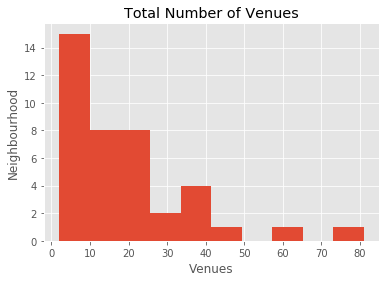

In [21]:
ax = Mumbai_venues.groupby('Neighborhood').count()
ax["Venue"].head(40).plot(kind='hist')
plt.title('Total Number of Venues')
plt.ylabel('Neighbourhood')
plt.xlabel('Venues')
plt.show()

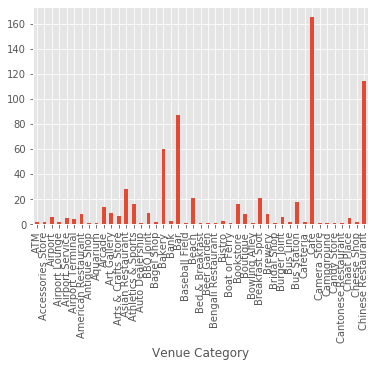

In [22]:
aa= Mumbai_venues.groupby("Venue Category").count()
aa["Venue"].head(45).plot(kind = "bar")
plt.show()

In [23]:
Mumbai_venues[Mumbai_venues["Venue Category"]=="Café"]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
85,B.N. bhavan,18.937132,72.832556,Cafe Excelsior,18.937701,72.833566,Café
103,B.N. bhavan,18.937132,72.832556,Mocambo Café,18.934267,72.833698,Café
120,B.P.lane,18.951606,72.834797,Noorani Milk Centre,18.954749,72.833382,Café
125,Bandra West,19.058336,72.830267,XVII Tea Room,19.059526,72.829247,Café
135,Bandra West,19.058336,72.830267,Pali Village Café,19.062056,72.829506,Café
145,Bandra West,19.058336,72.830267,145 Bandra,19.060330,72.829571,Café
161,Bandra West,19.058336,72.830267,Chéron,19.055254,72.830645,Café
163,Bandra West,19.058336,72.830267,Di Bella Coffee,19.061036,72.832526,Café
166,Bandra West,19.058336,72.830267,Cafe Coffee Day,19.059539,72.829368,Café
181,Bandra West,19.058336,72.830267,Jam Jar Diner Bandra,19.054906,72.828484,Café


In [24]:
print('There are {} uniques categories.'.format(len(Mumbai_venues['Venue Category'].unique())))

There are 198 uniques categories.


In [25]:
Mumbai_venues['Venue Category'].unique()[:100]


array(['Chinese Restaurant', 'Pizza Place', 'Indian Restaurant',
       'Fast Food Restaurant', 'Bar', 'Sporting Goods Shop', 'Lounge',
       'Bakery', 'Coffee Shop', 'Athletics & Sports', 'Soccer Field',
       'Platform', 'Airport', 'Jewelry Store', 'Airport Service',
       'Airport Lounge', 'Department Store', "Women's Store",
       'Sandwich Place', 'Restaurant', 'Food Court', 'Gift Shop', 'Hotel',
       'Shopping Mall', 'Camera Store', 'Electronics Store',
       'Gym / Fitness Center', 'Light Rail Station', 'Bus Station',
       'Vegetarian / Vegan Restaurant', 'Diner', 'Grocery Store', 'Trail',
       'Falafel Restaurant', 'Pub', 'Asian Restaurant', 'Snack Place',
       'Burger Joint', 'Bowling Alley', 'Gym', 'Park',
       'College Cafeteria', 'Motel', 'Café', 'Seafood Restaurant',
       'Multiplex', 'Flea Market', 'Train Station', 'History Museum',
       'Middle Eastern Restaurant', 'BBQ Joint', 'Dessert Shop',
       'Ice Cream Shop', 'American Restaurant', 'Convenienc

## Analyze Each Neighborhood

In [26]:
# one hot encoding
M_onehot = pd.get_dummies(Mumbai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
M_onehot['Neighborhood'] = Mumbai_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [M_onehot.columns[-1]] + list(M_onehot.columns[:-1])
M_onehot = M_onehot[fixed_columns]

M_onehot.head()

,Zoo,ATM,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Bus Line,Bus Station,Cafeteria,Café,Camera Store,Campground,Candy Store,Cantonese Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Cafeteria,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Gourmet Shop,Government Building,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indoor Play Area,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Light Rail Station,Liquor Store,Lounge,Luggage Store,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Venue,National Park,Neighborhood,New American Restaurant,Nightclub,North Indian Restaurant,Office,Opera House,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Racetrack,Record Shop,Recreation Center,Resort,Rest Area,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Track,Trail,Train,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,A I staff colony,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,A I staff colony,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,A I staff colony,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#### Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [27]:
M_grouped = M_onehot.groupby('Neighborhood').mean().reset_index()
M_grouped

,Neighborhood,Zoo,ATM,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Bus Line,Bus Station,Cafeteria,Café,Camera Store,Campground,Candy Store,Cantonese Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Cafeteria,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Gourmet Shop,Government Building,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indoor Play Area,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Light Rail Station,Liquor Store,Lounge,Luggage Store,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Venue,National Park,New American Restaurant,Nightclub,North Indian Restaurant,Office,Opera House,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Racetrack,Record Shop,Recreation Center,Resort,Rest Area,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Track,Trail,Train,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Women's Store,Yoga Studio
0,A I staff colony,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.125000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,

#### And let's examine the new dataframe size.

In [28]:
M_onehot.shape

(2791, 198)

In [29]:
M_grouped.shape

(179, 198)

#### Let's print each neighborhood along with the top 5 most common venues

In [30]:
num_top_venues = 5

for hood in M_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = M_grouped[M_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----A I staff colony----
                  venue  freq
0     Indian Restaurant  0.25
1  Fast Food Restaurant  0.12
2           Pizza Place  0.12
3    Chinese Restaurant  0.12
4                Lounge  0.12


----Agripada----
                venue  freq
0        Soccer Field   0.2
1            Platform   0.2
2         Coffee Shop   0.2
3              Bakery   0.2
4  Athletics & Sports   0.2


----Airport----
             venue  freq
0          Airport   0.4
1   Airport Lounge   0.2
2  Airport Service   0.2
3    Jewelry Store   0.2
4              Zoo   0.0


----Ambewadi----
                venue  freq
0   Indian Restaurant  0.50
1       Women's Store  0.25
2    Department Store  0.25
3                 Zoo  0.00
4  Mughlai Restaurant  0.00


----Andheri----
                  venue  freq
0     Indian Restaurant   0.3
1  Fast Food Restaurant   0.2
2        Sandwich Place   0.1
3            Food Court   0.1
4             Gift Shop   0.1


----Andheri East----
                  venue  freq
0 

                  venue  freq
0     Indian Restaurant  0.23
1  Fast Food Restaurant  0.15
2   Indie Movie Theater  0.08
3         Design Studio  0.08
4            Restaurant  0.08


----Government Colony----
               venue  freq
0               Café  0.17
1  Indian Restaurant  0.17
2        Pizza Place  0.08
3        Snack Place  0.08
4        Coffee Shop  0.08


----Gowalia Tank----
          venue  freq
0         Hotel  0.07
1     Gastropub  0.07
2   Pizza Place  0.07
3  Concert Hall  0.07
4   Coffee Shop  0.07


----Grant Road----
              venue  freq
0  Department Store  0.13
1             Hotel  0.07
2            Bakery  0.07
3     Deli / Bodega  0.07
4       Coffee Shop  0.07


----H.M.p. school----
                           venue  freq
0               Asian Restaurant  0.17
1                            Gym  0.17
2  Vegetarian / Vegan Restaurant  0.17
3                    Coffee Shop  0.17
4                 Sandwich Place  0.17


----Haffkin Institute----
            

                venue  freq
0  Chinese Restaurant  0.18
1   Indian Restaurant  0.12
2                 Bar  0.12
3                Park  0.06
4         Flea Market  0.06


----Mandapeshwar----
                venue  freq
0   Indian Restaurant  0.27
1            Pharmacy  0.07
2         Coffee Shop  0.07
3         Bus Station  0.07
4  English Restaurant  0.07


----Mandvi----
                venue  freq
0   Indian Restaurant  0.42
1               Hotel  0.11
2  Chinese Restaurant  0.05
3          Smoke Shop  0.05
4                Café  0.05


----Mantralaya----
                  venue  freq
0  Fast Food Restaurant  0.13
1     Indian Restaurant  0.06
2    Italian Restaurant  0.06
3                 Hotel  0.03
4     Electronics Store  0.03


----Marine Lines----
                venue  freq
0   Indian Restaurant   0.2
1       Train Station   0.1
2                Café   0.1
3  Italian Restaurant   0.1
4  Chinese Restaurant   0.1


----Marol Bazar----
               venue  freq
0        Pizza 

               venue  freq
0               Café  0.16
1        Coffee Shop  0.14
2              Hotel  0.11
3  Indian Restaurant  0.08
4                Bar  0.08


----Santacruz P&t colony----
                  venue  freq
0     Indian Restaurant  0.25
1  Fast Food Restaurant  0.12
2           Pizza Place  0.12
3    Chinese Restaurant  0.12
4                Lounge  0.12


----Santacruz(east)----
               venue  freq
0               Café  0.16
1        Coffee Shop  0.14
2              Hotel  0.11
3  Indian Restaurant  0.08
4                Bar  0.08


----Santacruz(west)----
                    venue  freq
0             Men's Store  0.17
1          Clothing Store  0.11
2      Chinese Restaurant  0.11
3  Furniture / Home Store  0.06
4       Electronics Store  0.06


----Secretariate----
                  venue  freq
0                  Café  0.14
1  Fast Food Restaurant  0.05
2    Seafood Restaurant  0.05
3             Bookstore  0.05
4           Coffee Shop  0.05


----Seepz----
  

In [31]:
len(M_grouped[M_grouped["Fast Food Restaurant"] > 0])

75

In [32]:
FFR = M_grouped[["Neighborhood","Fast Food Restaurant"]]
FFR

,Neighborhood,Fast Food Restaurant
0,A I staff colony,0.125000
1,Agripada,0.000000
2,Airport,0.000000
3,Ambewadi,0.000000
4,Andheri,0.200000
5,Andheri East,0.142857
6,Andheri Railway station,0.200000
7,Antop Hill,0.000000
8,Azad Nagar,0.000000
9,B P t colony,0.000000


#### Function to sort the venues in descending order.

In [33]:
# Sorting Function
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

#### Creating the new dataframe and display the top 10 venues for each neighborhood.

In [34]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = M_grouped['Neighborhood']

for ind in np.arange(M_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(M_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(12)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A I staff colony,Indian Restaurant,Lounge,Pizza Place,Bar,Sporting Goods Shop,Fast Food Restaurant,Chinese Restaurant,Concert Hall,Diner,Farm
1,Agripada,Coffee Shop,Soccer Field,Platform,Bakery,Athletics & Sports,Design Studio,Falafel Restaurant,Event Space,English Restaurant,Electronics Store
2,Airport,Airport,Airport Lounge,Airport Service,Jewelry Store,Yoga Studio,Dessert Shop,Farmers Market,Farm,Falafel Restaurant,Event Space
3,Ambewadi,Indian Restaurant,Women's Store,Department Store,Community Center,Concert Hall,Farmers Market,Farm,Falafel Restaurant,Event Space,English Restaurant
4,Andheri,Indian Restaurant,Fast Food Restaurant,Sandwich Place,Gift Shop,Restaurant,Bakery,Food Court,Yoga Studio,Dessert Shop,Event Space
5,Andheri East,Indian Restaurant,Fast Food Restaurant,Electronics Store,Gym / Fitness Center,Vegetarian / Vegan Restaurant,Camera Store,Shopping Mall,Chinese Restaurant,Light Rail Station,Bus Station
6,Andheri Railway station,Indian Restaurant,Fast Food Restaurant,Sandwich Place,Gift Shop,Restaurant,Bakery,Food Court,Yoga Studio,Dessert Shop,Event Space
7,Antop Hill,Grocery Store,Trail,Diner,Indian Restaurant,Department Store,Farm,Falafel Restaurant,Event Space,English Restaurant,Electronics Store
8,Azad Nagar,Bar,Coffee Shop,Athletics & Sports,Pizza Place,Sandwich Place,College Cafeteria,Burger Joint,Snack Place,Pub,Bowling Alley
9,B P t colony,Hotel,Motel,Yoga Studio,Design Studio,Farm,Falafel Restaurant,Event Space,English Restaurant,Electronics Store,Donut Shop


#### Using the elbow method to find the optimal number of clusters

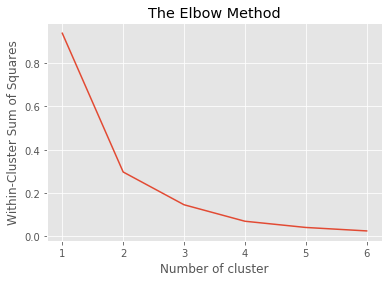

In [35]:
wcss = []
# run k-means clustering
M_grouped_clustering = FFR.drop('Neighborhood', 1)
for i in range(1,7):
    kmeans = KMeans(n_clusters=i, random_state=4).fit(M_grouped_clustering)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
# check cluster labels generated for each row in the dataframe
wcss

no_of_cluster = range(1,7)
plt.plot(no_of_cluster,wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("Within-Cluster Sum of Squares")
plt.show()

## Clustering Neighborhoods

In [36]:
# set number of clusters
kclusters = 3
M_grouped_clustering = FFR.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=4).fit(M_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [37]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
M_merged = df

# merge M_grouped with M_data to add latitude/longitude for each neighborhood
M_merged = M_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Location')

M_merged.head()# check the last columns!

,Location,Pincode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,A I staff colony,400029,19.151622,72.854981,1.0,Indian Restaurant,Lounge,Pizza Place,Bar,Sporting Goods Shop,Fast Food Restaurant,Chinese Restaurant,Concert Hall,Diner,Farm
2,Aareymilk Colony,400065,19.180136,72.908812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Agripada,400011,18.975302,72.824898,0.0,Coffee Shop,Soccer Field,Platform,Bakery,Athletics & Sports,Design Studio,Falafel Restaurant,Event Space,English Restaurant,Electronics Store
4,Airport,400099,19.090201,72.863808,0.0,Airport,Airport Lounge,Airport Service,Jewelry Store,Yoga Studio,Dessert Shop,Farmers Market,Farm,Falafel Restaurant,Event Space
5,Ambewadi,400004,19.186776,72.859313,0.0,Indian Restaurant,Women's Store,Department Store,Community Center,Concert Hall,Farmers Market,Farm,Falafel Restaurant,Event Space,English Restaurant


In [38]:
M_merged.dropna(subset=["Cluster Labels"], axis =0 , inplace =True)

In [39]:
M_merged.astype({"Cluster Labels": "int32"}).head()

,Location,Pincode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,A I staff colony,400029,19.151622,72.854981,1,Indian Restaurant,Lounge,Pizza Place,Bar,Sporting Goods Shop,Fast Food Restaurant,Chinese Restaurant,Concert Hall,Diner,Farm
3,Agripada,400011,18.975302,72.824898,0,Coffee Shop,Soccer Field,Platform,Bakery,Athletics & Sports,Design Studio,Falafel Restaurant,Event Space,English Restaurant,Electronics Store
4,Airport,400099,19.090201,72.863808,0,Airport,Airport Lounge,Airport Service,Jewelry Store,Yoga Studio,Dessert Shop,Farmers Market,Farm,Falafel Restaurant,Event Space
5,Ambewadi,400004,19.186776,72.859313,0,Indian Restaurant,Women's Store,Department Store,Community Center,Concert Hall,Farmers Market,Farm,Falafel Restaurant,Event Space,English Restaurant
6,Andheri,400053,19.119698,72.846420,1,Indian Restaurant,Fast Food Restaurant,Sandwich Place,Gift Shop,Restaurant,Bakery,Food Court,Yoga Studio,Dessert Shop,Event Space


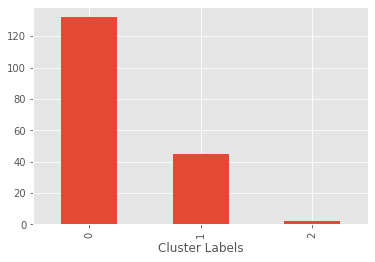

In [40]:
M_merged1 = M_merged.astype({"Cluster Labels": "int32"}).groupby(["Cluster Labels"]).count()
M_merged1["Pincode"].plot(kind = "bar")
plt.show()

#### Visualizing the resulting clusters

In [41]:
# create map
map_clusters = folium.Map(location=[19.0760, 72.8777], zoom_start=10.75)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(M_merged['Latitude'], M_merged['Longitude'], M_merged['Location'], M_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

## Examine Clusters 

In [42]:
M_merged.loc[M_merged['Cluster Labels'] == 0, M_merged.columns[[1] + list(range(5, M_merged.shape[1]))]]

,Pincode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,400011,Coffee Shop,Soccer Field,Platform,Bakery,Athletics & Sports,Design Studio,Falafel Restaurant,Event Space,English Restaurant,Electronics Store
4,400099,Airport,Airport Lounge,Airport Service,Jewelry Store,Yoga Studio,Dessert Shop,Farmers Market,Farm,Falafel Restaurant,Event Space
5,400004,Indian Restaurant,Women's Store,Department Store,Community Center,Concert Hall,Farmers Market,Farm,Falafel Restaurant,Event Space,English Restaurant
9,400037,Grocery Store,Trail,Diner,Indian Restaurant,Department Store,Farm,Falafel Restaurant,Event Space,English Restaurant,Electronics Store
11,400053,Bar,Coffee Shop,Athletics & Sports,Pizza Place,Sandwich Place,College Cafeteria,Burger Joint,Snack Place,Pub,Bowling Alley
12,400003,Hotel,Motel,Yoga Studio,Design Studio,Farm,Falafel Restaurant,Event Space,English Restaurant,Electronics Store,Donut Shop
13,400051,Indian Restaurant,Coffee Shop,Café,Seafood Restaurant,Bar,Athletics & Sports,Sandwich Place,Multiplex,Train Station,Chinese Restaurant
14,400003,Indian Restaurant,Indian Sweet Shop,American Restaurant,Dessert Shop,Ice Cream Shop,Electronics Store,Café,Middle Eastern Restaurant,Restaurant,Chinese Restaurant
15,400050,Indian Restaurant,Café,Chinese Restaurant,Bakery,Asian Restaurant,Bar,Pub,Clothing Store,Bookstore,Coffee Shop
16,400051,Indian Restaurant,Café,Chinese Restaurant,Tunnel,Pizza Place,Restaurant,Bistro,Italian Restaurant,Dessert Shop,Falafel Restaurant


In [43]:
M_merged.loc[M_merged['Cluster Labels'] == 1, M_merged.columns[[1] + list(range(5, M_merged.shape[1]))]]

,Pincode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,400029,Indian Restaurant,Lounge,Pizza Place,Bar,Sporting Goods Shop,Fast Food Restaurant,Chinese Restaurant,Concert Hall,Diner,Farm
6,400053,Indian Restaurant,Fast Food Restaurant,Sandwich Place,Gift Shop,Restaurant,Bakery,Food Court,Yoga Studio,Dessert Shop,Event Space
7,400069,Indian Restaurant,Fast Food Restaurant,Electronics Store,Gym / Fitness Center,Vegetarian / Vegan Restaurant,Camera Store,Shopping Mall,Chinese Restaurant,Light Rail Station,Bus Station
8,400058,Indian Restaurant,Fast Food Restaurant,Sandwich Place,Gift Shop,Restaurant,Bakery,Food Court,Yoga Studio,Dessert Shop,Event Space
20,400007,Pizza Place,Fast Food Restaurant,Spanish Restaurant,Restaurant,Design Studio,Falafel Restaurant,Event Space,English Restaurant,Electronics Store,Donut Shop
27,400020,Fast Food Restaurant,Indian Restaurant,Ice Cream Shop,Hotel,Café,Coffee Shop,Field,Italian Restaurant,Bookstore,Movie Theater
29,400093,Hotel,Restaurant,Fast Food Restaurant,Multiplex,Pizza Place,Lounge,Café,Asian Restaurant,Indian Restaurant,Bakery
33,400004,Fast Food Restaurant,Bakery,Juice Bar,Grocery Store,Vegetarian / Vegan Restaurant,Italian Restaurant,Snack Place,Ice Cream Shop,Indian Restaurant,Breakfast Spot
35,400011,Fast Food Restaurant,Multiplex,Spa,Coffee Shop,Community Center,Concert Hall,Farm,Falafel Restaurant,Event Space,College Auditorium
41,400014,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Movie Theater,Café,Plaza,Mobile Phone Shop,Breakfast Spot,Lounge,Farmers Market


In [44]:
M_merged.loc[M_merged['Cluster Labels'] == 2, M_merged.columns[[1] + list(range(5, M_merged.shape[1]))]]

,Pincode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
142,400060,Fast Food Restaurant,Pharmacy,Department Store,Farm,Falafel Restaurant,Event Space,English Restaurant,Electronics Store,Donut Shop,Diner
161,400033,Fast Food Restaurant,Historic Site,Pizza Place,Department Store,Falafel Restaurant,Event Space,English Restaurant,Electronics Store,Donut Shop,Diner
